In [151]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#  -------------------------------------------
"""
입출력 양식을 
준수해 주십시오

###  INPUT ###
import pandas as pd
input_data = pd.read_csv('2023_smartFarm_AI_hackathon_dataset.csv')

{
    
    Write codes...
    
    Training model name : model
    ex) y_pred = model.predict(X_test)

}


### OUTPUT ###
print("RMSE:", rmse)
print("R2_score:", r2score)
"""

'\n입출력 양식을 \n준수해 주십시오\n\n###  INPUT ###\nimport pandas as pd\ninput_data = pd.read_csv(\'2023_smartFarm_AI_hackathon_dataset.csv\')\n\n{\n    \n    Write codes...\n    \n    Training model name : model\n    ex) y_pred = model.predict(X_test)\n\n}\n\n\n### OUTPUT ###\nprint("RMSE:", rmse)\nprint("R2_score:", r2score)\n'

In [3]:
###  INPUT ###
import pandas as pd
input_data = pd.read_csv('2023_smartFarm_AI_hackathon_dataset.csv')

In [4]:
input_data.shape

(84840, 47)

In [5]:
input_data.head(3)

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
0,DBSF1059,20220926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
1,DBSF1059,20221001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1347.554178,202.133127,4711.308821,5936.249114,0.0,0.0,190.16899,2221.173803,0.0
2,DBSF1059,20221002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,69.899353,10.484903,271.379890,341.938662,0.0,0.0,0.00000,0.000000,0.0


In [6]:
inTp_zero_indexs = input_data[input_data['inTp'] == 0.0].index  # 12210 
inHd_zero_indexs = input_data[input_data['inHd'] == 0.0].index  # 12210 
otmsuplyqy_zero_indexs = input_data[input_data['otmsuplyqy'] == 0.0].index  
acSlrdQy_zero_indexs = input_data[input_data['acSlrdQy'] == 0.0].index  
outTp_zero_indexs = input_data[input_data['outTp'] == 0.0].index  
outWs_zero_indexs = input_data[input_data['outWs'] == 0.0].index  
frmWeek_zero_indexs = input_data[input_data['frmWeek'] == 0.0].index  


In [7]:
print(len(inTp_zero_indexs))
print(len(inHd_zero_indexs))
print(len(otmsuplyqy_zero_indexs))
print(len(acSlrdQy_zero_indexs))
print(len(outTp_zero_indexs))
print(len(outWs_zero_indexs))
print(len(frmWeek_zero_indexs))

12210
12210
21750
31770
12210
46170
11580


In [8]:
# 내부온도, 내부습도, 외부온도 값이 0인 것들은 동일한 행들이 0이다.
# inTp, inHd, outTp 가 없는 데이터는 모두 동일하다..
((inTp_zero_indexs == inHd_zero_indexs) == (inTp_zero_indexs == outTp_zero_indexs)).sum()

12210

In [9]:
input_data

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
0,DBSF1059,20220926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
1,DBSF1059,20221001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1347.554178,202.133127,4711.308821,5936.249114,0.000000,0.0000,190.168990,2221.173803,0.0
2,DBSF1059,20221002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,69.899353,10.484903,271.379890,341.938662,0.000000,0.0000,0.000000,0.000000,0.0
3,DBSF1059,20221003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,412.225065,61.833760,1539.505534,1939.776973,253.744916,149.7095,0.000000,0.000000,0.0
4,DBSF1059,20221004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,590.608634,88.591295,2614.973165,3294.866187,3032.885084,1789.4022,1.149739,13.428955,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84835,DBSF9969,20180710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,235272.042536,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
84836,DBSF9969,20180711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,227947.124946,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
84837,DBSF9969,20180712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,231527.426327,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
84838,DBSF9969,20180713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,251254.321635,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0


In [10]:
input_data[input_data['frmDist'] =='DBSF9969']

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
84492,DBSF9969,20170801,28.353883,64.659709,0.0,2407.576736,0.0,0.0,29.956450,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84493,DBSF9969,20170802,28.615920,72.121873,0.0,2479.309995,0.0,0.0,31.850657,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84494,DBSF9969,20170803,27.380284,77.221402,0.0,2883.713089,0.0,0.0,33.103792,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84495,DBSF9969,20170804,34.399242,79.319913,0.0,2118.980980,0.0,0.0,30.714981,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84496,DBSF9969,20170805,34.525697,67.119344,0.0,2495.336434,0.0,0.0,31.550388,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84835,DBSF9969,20180710,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,235272.042536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84836,DBSF9969,20180711,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,227947.124946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84837,DBSF9969,20180712,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,231527.426327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84838,DBSF9969,20180713,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,251254.321635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
input_data[input_data['frmDist'] =='DBSF9969']

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
84492,DBSF9969,20170801,28.353883,64.659709,0.0,2407.576736,0.0,0.0,29.956450,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84493,DBSF9969,20170802,28.615920,72.121873,0.0,2479.309995,0.0,0.0,31.850657,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84494,DBSF9969,20170803,27.380284,77.221402,0.0,2883.713089,0.0,0.0,33.103792,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84495,DBSF9969,20170804,34.399242,79.319913,0.0,2118.980980,0.0,0.0,30.714981,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84496,DBSF9969,20170805,34.525697,67.119344,0.0,2495.336434,0.0,0.0,31.550388,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84835,DBSF9969,20180710,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,235272.042536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84836,DBSF9969,20180711,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,227947.124946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84837,DBSF9969,20180712,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,231527.426327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84838,DBSF9969,20180713,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,251254.321635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
data_df = input_data[input_data['HeatingEnergyUsage_cumsum'] > 0]

In [48]:
data_df.sort_values('date').head(3)

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
5,DBSF1059,20221005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1184.250534,177.637580,3472.071350,4374.809901,1284.15886,757.653727,119.267290,1393.041951,2.568808e+06
60011,DBSF6990,20221005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,928.335595,139.250339,3535.772467,4455.073309,0.00000,0.000000,113.117337,1321.210495,2.398283e+06
59867,DBSF6949,20221005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,820.016171,123.002426,3136.209020,3951.623365,0.00000,0.000000,23.691994,276.722493,1.802663e+06


In [49]:
data_df.sort_values('date').tail(3)

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
27093,DBSF3597,20221209,0.0,0.0,0.0,0.0,0.0,5.025377,0.0,0.0,...,102.024770,1979.314840,296.897226,4143.138629,5220.354673,0.000000,0.000000,0.000000,0.000000,2.895186e+06
10204,DBSF2252,20221209,0.0,0.0,0.0,0.0,0.0,4.813463,0.0,0.0,...,121.026236,1087.348285,163.102243,3922.027797,4941.755025,20.098641,11.858198,291.062026,3399.604465,2.477092e+06
84119,DBSF9948,20221209,0.0,0.0,0.0,0.0,0.0,4.485491,0.0,0.0,...,62.456275,1382.835955,207.425393,2845.853970,3585.776002,0.000000,0.000000,105.033000,1226.785440,2.184814e+06


In [50]:
data_df.shape

(7500, 47)

In [51]:
tmp_df = data_df[data_df['date'] >= 20221005]

In [52]:
# data_df와 tmp_df가 동일하다.
(data_df.index == tmp_df.index).sum()

7500

### data_df를 사용하기

In [53]:
data_df.head(3)

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
5,DBSF1059,20221005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1184.250534,177.637580,3472.071350,4374.809901,1284.158860,757.653727,119.267290,1393.041951,2.568808e+06
6,DBSF1059,20221006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,646.845390,97.026809,1809.523663,2279.999815,0.000000,0.000000,285.832983,3338.529244,2.668313e+06
7,DBSF1059,20221007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1168.820978,175.323147,2549.548471,3212.431073,81.845044,48.288576,265.494161,3100.971802,2.783386e+06


In [54]:
tmp_df = data_df.groupby('frmDist').count()

In [20]:
# 개수가 64개보다 많은 경우는 없다.
# 7(일수) * 16 = 112
(tmp_df['date'] > 64).sum()

0

In [55]:
# DBSF1059: 20221005 ~ 20221209 는 총 66일이고, 7로 나누면 9주가 나온다.
data_df[data_df['frmDist'] == 'DBSF3597']

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
27029,DBSF3597,20221006,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,377.529614,56.629442,698.445158,880.040899,0.000000,0.000000,51.069191,596.488156,3.095847e+06
27030,DBSF3597,20221007,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,1473.051468,220.957720,1226.829804,1545.805553,0.000000,0.000000,8.797839,102.758757,3.153678e+06
27031,DBSF3597,20221008,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,1386.290877,207.943632,1390.606144,1752.163742,0.000000,0.000000,7.938526,92.721988,3.264947e+06
27033,DBSF3597,20221010,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,1273.407126,191.011069,3801.005816,4789.267328,0.000000,0.000000,0.000000,0.000000,2.863512e+06
27034,DBSF3597,20221011,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2399.265030,359.889754,5538.092410,6977.996437,0.000000,0.000000,10.611922,123.947254,3.281862e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27089,DBSF3597,20221205,0.0,0.0,0.0,0.0,0.0,4.704773,0.0,0.0,...,78.013893,2436.871552,365.530733,6086.770676,7669.331052,26.943651,15.896754,0.000000,0.000000,2.150200e+06
27090,DBSF3597,20221206,0.0,0.0,0.0,0.0,0.0,4.982944,0.0,0.0,...,0.000000,841.646505,126.246976,2222.994920,2800.973600,0.000000,0.000000,0.000000,0.000000,2.335002e+06
27091,DBSF3597,20221207,0.0,0.0,0.0,0.0,0.0,5.798516,0.0,0.0,...,88.203552,1542.487037,231.373056,3873.023792,4880.009978,0.000000,0.000000,0.000000,0.000000,2.555643e+06
27092,DBSF3597,20221208,0.0,0.0,0.0,0.0,0.0,5.688699,0.0,0.0,...,0.000000,2539.684629,380.952694,5463.778777,6884.361259,0.000000,0.000000,52.407785,612.122929,2.725828e+06


frmDist (농가구역)을 좀 모아서 input을 해야될 것 같다.

같은 농가일 경우 ... 누적 생산량을 기준으로 

얼마나 더 생산되었는지를 비교해서 새로운 칼럼을 생성해야 하는지?

In [56]:
data_df[data_df['frmDist'] == 'DBSF3597']

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
27029,DBSF3597,20221006,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,377.529614,56.629442,698.445158,880.040899,0.000000,0.000000,51.069191,596.488156,3.095847e+06
27030,DBSF3597,20221007,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,1473.051468,220.957720,1226.829804,1545.805553,0.000000,0.000000,8.797839,102.758757,3.153678e+06
27031,DBSF3597,20221008,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,1386.290877,207.943632,1390.606144,1752.163742,0.000000,0.000000,7.938526,92.721988,3.264947e+06
27033,DBSF3597,20221010,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,1273.407126,191.011069,3801.005816,4789.267328,0.000000,0.000000,0.000000,0.000000,2.863512e+06
27034,DBSF3597,20221011,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2399.265030,359.889754,5538.092410,6977.996437,0.000000,0.000000,10.611922,123.947254,3.281862e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27089,DBSF3597,20221205,0.0,0.0,0.0,0.0,0.0,4.704773,0.0,0.0,...,78.013893,2436.871552,365.530733,6086.770676,7669.331052,26.943651,15.896754,0.000000,0.000000,2.150200e+06
27090,DBSF3597,20221206,0.0,0.0,0.0,0.0,0.0,4.982944,0.0,0.0,...,0.000000,841.646505,126.246976,2222.994920,2800.973600,0.000000,0.000000,0.000000,0.000000,2.335002e+06
27091,DBSF3597,20221207,0.0,0.0,0.0,0.0,0.0,5.798516,0.0,0.0,...,88.203552,1542.487037,231.373056,3873.023792,4880.009978,0.000000,0.000000,0.000000,0.000000,2.555643e+06
27092,DBSF3597,20221208,0.0,0.0,0.0,0.0,0.0,5.688699,0.0,0.0,...,0.000000,2539.684629,380.952694,5463.778777,6884.361259,0.000000,0.000000,52.407785,612.122929,2.725828e+06


In [57]:
tmp_df

,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,daysuplyqy,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
frmDist,,,,,,,,,,,,,,,,,,,,,
DBSF1059,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
DBSF1093,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
DBSF1121,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
DBSF1172,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
DBSF1180,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DBSF9498,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
DBSF9546,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
DBSF9631,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64


In [46]:
data_df

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,frmAr,frmDov,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost
5,DBSF1059,20221005,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,30,4.5,1184.250534,177.637580,3472.071350,4374.809901,1284.158860,757.653727,119.267290,1393.041951
6,DBSF1059,20221006,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,30,4.5,646.845390,97.026809,1809.523663,2279.999815,0.000000,0.000000,285.832983,3338.529244
7,DBSF1059,20221007,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,30,4.5,1168.820978,175.323147,2549.548471,3212.431073,81.845044,48.288576,265.494161,3100.971802
8,DBSF1059,20221008,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,30,4.5,1791.185707,268.677856,3799.379061,4787.217616,197.122990,116.302564,162.631777,1899.539160
9,DBSF1059,20221009,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,30,4.5,650.074310,97.511146,1246.753231,1570.909071,3160.698307,1864.812001,129.327842,1510.549190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84115,DBSF9948,20221205,0.0,0.0,0.0,0.0,0.0,6.183796,0.0,0.0,...,30,4.5,1778.938347,266.840752,4642.723190,5849.831220,0.000000,0.000000,13.239208,154.633954
84116,DBSF9948,20221206,0.0,0.0,0.0,0.0,0.0,5.824145,0.0,0.0,...,30,4.5,1137.150478,170.572572,3119.735391,3930.866593,0.000000,0.000000,0.000000,0.000000
84117,DBSF9948,20221207,0.0,0.0,0.0,0.0,0.0,4.836082,0.0,0.0,...,30,4.5,1212.532342,181.879851,3117.809494,3928.439962,0.000000,0.000000,0.000000,0.000000
84118,DBSF9948,20221208,0.0,0.0,0.0,0.0,0.0,5.378754,0.0,0.0,...,30,4.5,1529.960612,229.494092,3826.962159,4821.972321,0.000000,0.000000,72.004150,841.008474


In [94]:
group_df = data_df.groupby('frmDist').mean()

In [95]:
group_df.shape

(120, 46)

In [96]:
group_outtrn_cumsum_df = data_df.groupby('frmDist').max()[['outtrn_cumsum']]

In [97]:
group_df.drop(['outtrn_cumsum', 'date'], axis=1, inplace=True)

In [98]:
merge_df = pd.concat([group_df, group_outtrn_cumsum_df], axis=1)

In [99]:
merge_df

,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,daysuplyqy,inCo2,...,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum,outtrn_cumsum
frmDist,,,,,,,,,,,,,,,,,,,,,
DBSF1059,0.0,0.0,0.0,0.0,0.0,2.715814,0.0,0.0,0.0,0.0,...,1281.073237,192.160986,3441.857364,4336.740278,171.244700,101.034373,337.092517,3937.240596,1.711747e+06,117.918757
DBSF1093,0.0,0.0,0.0,0.0,0.0,2.559140,0.0,0.0,0.0,0.0,...,1689.911530,253.486730,3867.747036,4873.361265,307.188212,181.241045,27.330754,319.223212,1.158434e+06,128.392914
DBSF1121,0.0,0.0,0.0,0.0,0.0,2.788695,0.0,0.0,0.0,0.0,...,1329.158742,199.373811,3539.727499,4460.056649,181.981360,107.369003,333.198186,3891.754818,1.605825e+06,116.840720
DBSF1172,0.0,0.0,0.0,0.0,0.0,2.810860,0.0,0.0,0.0,0.0,...,1309.754907,196.463236,3444.138000,4339.613880,171.825212,101.376875,347.498742,4058.785305,1.636814e+06,121.933091
DBSF1180,0.0,0.0,0.0,0.0,0.0,2.506407,0.0,0.0,0.0,0.0,...,1762.838368,264.425755,3813.614648,4805.154456,356.033200,210.059588,28.550013,333.464148,1.225309e+06,142.295235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DBSF9498,0.0,0.0,0.0,0.0,0.0,2.562330,0.0,0.0,0.0,0.0,...,1755.182835,263.277425,3846.308480,4846.348685,317.184538,187.138877,27.797261,324.672004,1.210305e+06,135.368433
DBSF9546,0.0,0.0,0.0,0.0,0.0,2.824121,0.0,0.0,0.0,0.0,...,1293.847217,194.077082,3529.339267,4446.967477,164.497697,97.053641,339.609854,3966.643099,1.715991e+06,121.386958
DBSF9631,0.0,0.0,0.0,0.0,0.0,2.808251,0.0,0.0,0.0,0.0,...,1307.025812,196.053872,3622.966550,4564.937853,172.770151,101.934389,342.507616,4000.488949,1.615967e+06,118.460822


In [100]:
train_data = merge_df.drop(['outtrn_cumsum', 'HeatingEnergyUsage_cumsum'], axis=1)
target_data = merge_df.loc[:,['outtrn_cumsum', 'HeatingEnergyUsage_cumsum']]

In [101]:
print(train_data.shape)
print(target_data.shape)

(120, 43)
(120, 2)


### 상관관계 확인하기

In [107]:
import seaborn as sns
tmp = input_data.drop(['frmDist'], axis=1)
tmp_df = tmp.corr()


In [117]:
nan_columns = ['daysuplyqy', 'lefstalklt', 'frtstSetCo', 'flanJnt', 'pllnLt', 'hvstJnt', 'flwrCo', 'frtstJnt']
clean_tmp_df = tmp_df.drop(nan_columns, axis=1).drop(nan_columns, axis=0)

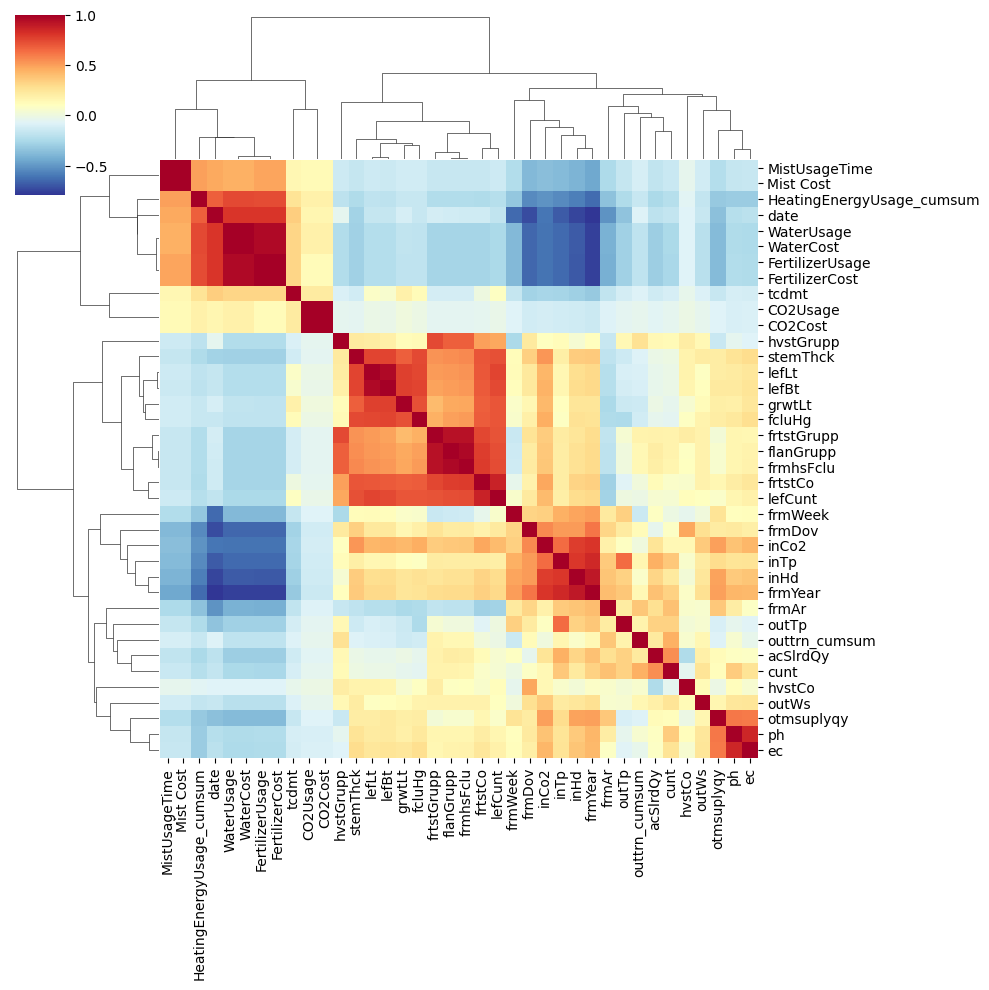

In [119]:
sns.clustermap(clean_tmp_df, 
               cmap='RdYlBu_r')

In [125]:
merge_df.shape

(120, 45)

In [128]:
merge_df.head(3)

,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,daysuplyqy,inCo2,...,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum,outtrn_cumsum
frmDist,,,,,,,,,,,,,,,,,,,,,
DBSF1059,0.0,0.0,0.0,0.0,0.0,2.715814,0.0,0.0,0.0,0.0,...,1281.073237,192.160986,3441.857364,4336.740278,171.244700,101.034373,337.092517,3937.240596,1.711747e+06,117.918757
DBSF1093,0.0,0.0,0.0,0.0,0.0,2.559140,0.0,0.0,0.0,0.0,...,1689.911530,253.486730,3867.747036,4873.361265,307.188212,181.241045,27.330754,319.223212,1.158434e+06,128.392914
DBSF1121,0.0,0.0,0.0,0.0,0.0,2.788695,0.0,0.0,0.0,0.0,...,1329.158742,199.373811,3539.727499,4460.056649,181.981360,107.369003,333.198186,3891.754818,1.605825e+06,116.840720


### 훈련, 테스트 나누기

In [133]:
# 훈련, 테스트 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    train_data, target_data, random_state = 42, test_size=0.2)

In [134]:
print(train_input.shape)
print(test_input.shape)

(96, 43)
(24, 43)


In [135]:
# 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 모델 생성

### 선형회귀

In [136]:
# 선형 회귀 모델
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [140]:
test_pred = lr.predict(test_input)

In [156]:
def output(test_target, test_pred):
    rmse = np.sqrt(mean_squared_error(test_target, test_pred))
    r2score = r2_score(test_target, test_pred)
    return rmse, r2score

In [157]:
rmse, r2score = output(test_target, test_pred)

In [158]:
### OUTPUT ###
print("RMSE:", rmse)
print("R2_score:", r2score)

RMSE: 38452.572183776625
R2_score: 0.9523541587848574


In [159]:
# 선형 회귀 모델
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_scaled, train_target)

LinearRegression()

In [160]:
test_pred = lr.predict(test_scaled)

In [161]:
rmse, r2score = output(test_target, test_pred)

In [162]:
### OUTPUT ###
print("RMSE:", rmse)
print("R2_score:", r2score)

RMSE: 38319.866051443845
R2_score: 0.9523175418006364


In [167]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
test_pred = lasso.predict(test_scaled)
rmse, r2score = output(test_target, test_pred)

### XGBoost와 교차검증 사용하기

In [196]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)

In [197]:
xgb.fit(train_scaled, train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [198]:
test_pred = xgb.predict(test_scaled)
rmse, r2score = output(test_target, test_pred)

In [210]:
xgb = XGBRegressor(random_state=42, num_boost_round=300, n_estimators=85, max_depth=8,
                   learning_rate=0.15099999999999997, gamma=5, alpha=2
                  )
xgb.fit(train_scaled, train_target)
test_pred = xgb.predict(test_scaled)
rmse, r2score = output(test_target, test_pred)

[15:08:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



In [211]:
### OUTPUT ###
print("RMSE:", rmse)
print("R2_score:", r2score)

RMSE: 31093.122760395603
R2_score: 0.959499283893322


### XGBoost 랜덤서치

In [200]:
params = {
    'n_estimators':range(5,100,5),
    'max_depth':range(3,11,1),
    'learning_rate':np.arange(0.001, 0.2, 0.01),
    'gamma': range(0, 10),
    'lambda': range(0, 10),
    'alpha':range(0, 10),
    'num_boost_round':range(300, 600, 100),    
}

In [203]:
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor()
gs = RandomizedSearchCV(xgb, params, n_iter=100,
                        n_jobs=-1, random_state=42)
gs.fit(train_scaled, train_target)

[15:06:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': range(0, 10),
                                        'gamma': range(0, 10),
                                        'lambda': range(0, 10),
                                        'learning_rate': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191]),
                                        'max_depth': range(3, 11),
                                        'n_estimators': range(5, 100, 5),
                                        'num_boost_round': range(300, 600, 100)},
                   random_state=42)

In [204]:
print(gs.best_params_)

{'num_boost_round': 300, 'n_estimators': 85, 'max_depth': 8, 'learning_rate': 0.15099999999999997, 'lambda': 2, 'gamma': 5, 'alpha': 2}


In [213]:
### OUTPUT ###
print("RMSE:", rmse)
print("R2_score:", r2score)

RMSE: 31093.122760395603
R2_score: 0.959499283893322


### 딥러닝

In [193]:
'''
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(2))

model.compile(optimizer='adam',
            loss=tf.keras.metrics.mean_squared_error,
            metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
             )

             
model.fit(train_scaled, train_target, epochs=10000)
'''